#### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#### Load and Preprocess the Excel data

In [3]:
# Load the Excel file
df = pd.read_excel("3Signet_data_1.xlsx", header=None, engine='openpyxl')

In [4]:
#Split the first column by semicolons
split_data = df[0].str.split(';', expand=True)

In [5]:
# Get the first row
first_row = split_data.iloc[0]

# Check if the first row contains 'Marital status'
if first_row.str.contains('Marital status').any():
    # Set the first row as the header
    split_data.columns = first_row
    # Remove the first row since it is now the header
    split_data = split_data[1:].reset_index(drop=True)

In [6]:
school_data = split_data

In [7]:
#To show all columns in the dataframe
pd.set_option('display.max_columns', None)

In [8]:
#Check few rows
school_data.head()

,Marital status,Application mode,Application order,Course,"""Daytime/evening attendance\t""",Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571428571429,0,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333333333334,0,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


#### Data Exploration

In [9]:
#Check the shape of the dataset (number of rows and columns)
school_data.shape

(4424, 37)

In [10]:
#Check the data types of each column
school_data.dtypes

0
Marital status                                    object
Application mode                                  object
Application order                                 object
Course                                            object
"Daytime/evening attendance\t"                    object
Previous qualification                            object
Previous qualification (grade)                    object
Nacionality                                       object
Mother's qualification                            object
Father's qualification                            object
Mother's occupation                               object
Father's occupation                               object
Admission grade                                   object
Displaced                                         object
Educational special needs                         object
Debtor                                            object
Tuition fees up to date                           object
Gender                       

In [11]:
#Check the statistical summary of the data
school_data.describe()

,Marital status,Application mode,Application order,Course,"""Daytime/evening attendance\t""",Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,101,21,29,34,32,46,620,2,2,2,2,2,2,46,2,21,23,35,23,805,11,19,22,30,20,786,10,10,9,10,3
top,1,1,1,9500,1,1,133.1,1,1,37,9,9,130.0,1,0,0,1,0,0,18,0,0,6,8,6,0.0,0,0,6,8,6,0.0,0,7.6,1.4,0.32,Graduate
freq,3919,1708,3026,766,3941,3717,491,4314,1069,1209,1577,1010,162,2426,4373,3921,3896,2868,3325,1036,4314,3847,1910,791,1171,718,4130,3894,1913,792,965,870,4142,571,893,571,2209


- All columns are treated as categorical data with object datatype. This will be converted in data cleaning process and then summary statistics will be checked

#### Data Cleaning and Validation

##### - Rename column

In [12]:
#rename nacionality to Nationality
school_data.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [13]:
# remove "" and \t from column header
school_data.columns = school_data.columns.str.replace('"', '').str.replace('\t', '').str.strip()

# Verify the cleaned column headers
school_data.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

##### - Convert columns to the right datatype

In [14]:
# List of columns to convert to integers
columns_to_convert = [
    'Marital status', 'Application mode', 'Application order', 'Course', 
    'Daytime/evening attendance', 'Previous qualification', 'Nationality', 
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", 'Displaced', 'Educational special needs', 
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 
    'Age at enrollment', 'International', 
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)'
]

In [15]:
# Convert the columns to integers
school_data[columns_to_convert] = school_data[columns_to_convert].astype(int)

In [16]:
# List of columns to convert to float
columns_to_convert_to_float = [
    'Previous qualification (grade)', 'Admission grade', 
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 'Inflation rate', 'GDP'
]

In [17]:
# Convert the columns to float
school_data[columns_to_convert_to_float] = school_data[columns_to_convert_to_float].astype(float)


In [18]:
#check datatype to confirm
school_data.dtypes

0
Marital status                                      int32
Application mode                                    int32
Application order                                   int32
Course                                              int32
Daytime/evening attendance                          int32
Previous qualification                              int32
Previous qualification (grade)                    float64
Nationality                                         int32
Mother's qualification                              int32
Father's qualification                              int32
Mother's occupation                                 int32
Father's occupation                                 int32
Admission grade                                   float64
Displaced                                           int32
Educational special needs                           int32
Debtor                                              int32
Tuition fees up to date                             int32
Gender      

##### - Round some columns

In [19]:
# Round the columns to 1 decimal place
school_data['Curricular units 1st sem (grade)'] = school_data['Curricular units 1st sem (grade)'].round(1)
school_data['Curricular units 2nd sem (grade)'] = school_data['Curricular units 2nd sem (grade)'].round(1)

In [20]:
#recheck the summary statistics
school_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Marital status,4424.0,1.178571,0.605747,1.00,1.0,1.00,1.00,6.00
Application mode,4424.0,18.669078,17.484682,1.00,1.0,17.00,39.00,57.00
Application order,4424.0,1.727848,1.313793,0.00,1.0,1.00,2.00,9.00
Course,4424.0,8856.642631,2063.566416,33.00,9085.0,9238.00,9556.00,9991.00
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.0,1.00,1.00,1.00
Previous qualification,4424.0,4.577758,10.216592,1.00,1.0,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.0,133.10,140.00,190.00
Nationality,4424.0,1.873192,6.914514,1.00,1.0,1.00,1.00,109.00
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.0,19.00,37.00,44.00


##### - Handle missing values

In [21]:
#Check for missing values
school_data.isnull().sum()

0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enr

- There are no missing values

##### - Remove duplicate entries

In [22]:
# Find duplicated rows
duplicates = school_data[school_data.duplicated()]
duplicates

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


- There are no duplicate entries

##### - Identify Outliers

In [23]:
numerical_cols = school_data.select_dtypes(include=['float64', 'int64']).columns

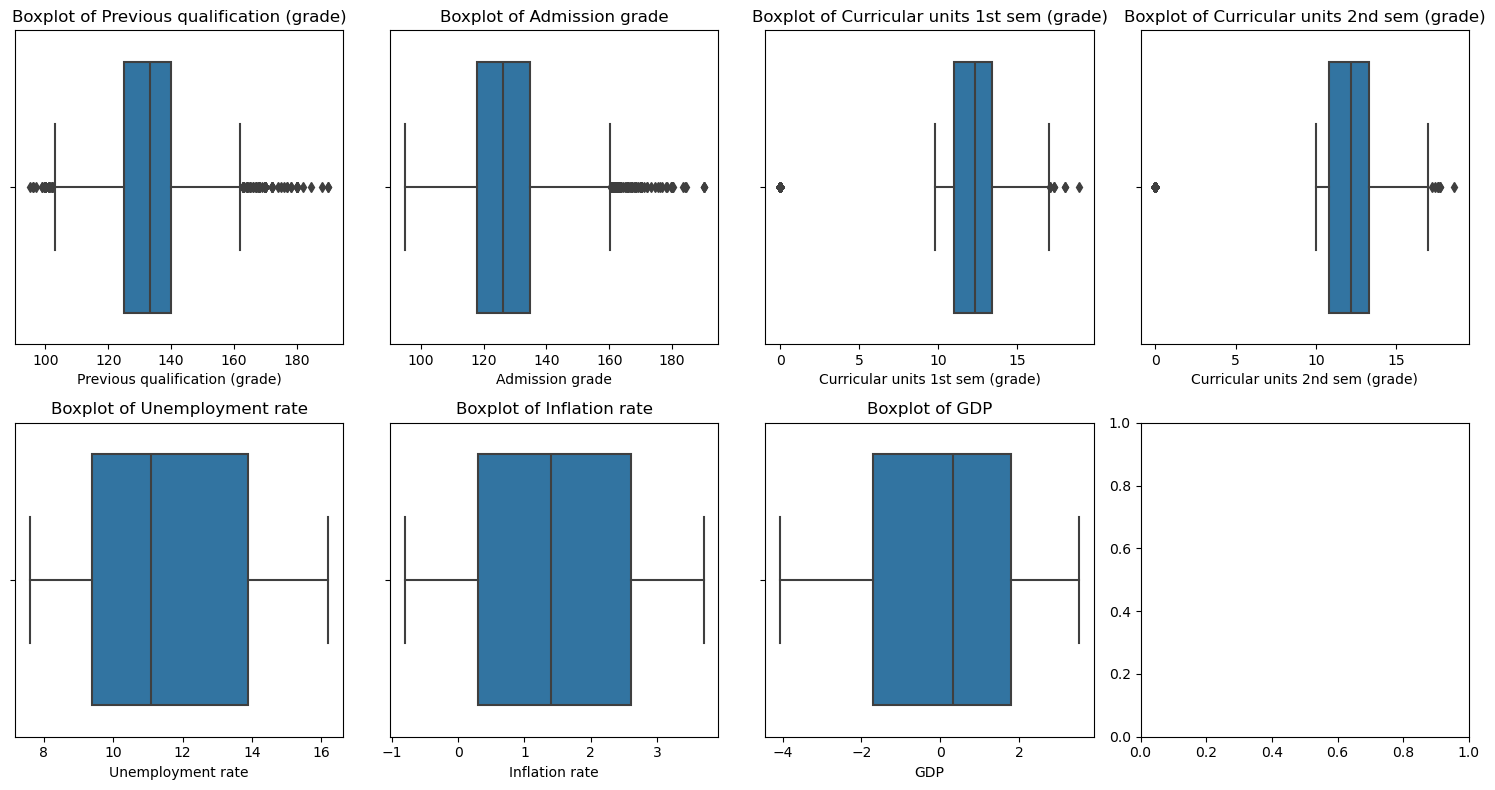

In [24]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Iterate through columns and create boxplots without gridlines
for i, col in enumerate(numerical_cols):
    row, col_idx = i // 4, i % 4
    sns.boxplot(x=col, data=school_data, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Boxplot of {col}")
    axes[row, col_idx].grid(False) 

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

##### - Handle outliers(Using Standard Deviation for Capping)

In [25]:
Outlier_cols = ['Previous qualification (grade)', 'Admission grade',
                'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)'
]

# Define the mean and standard deviation
mean = school_data[Outlier_cols].mean()
std_dev = school_data[Outlier_cols].std()

# Define the capping thresholds (mean ± 3 * std_dev)
lower_limit = mean - 3 * std_dev
upper_limit = mean + 3 * std_dev

# Cap values below the lower limit and above the upper limit
school_data[Outlier_cols] = np.where(school_data[Outlier_cols] < lower_limit, lower_limit, school_data[Outlier_cols])
school_data[Outlier_cols] = np.where(school_data[Outlier_cols] > upper_limit, upper_limit, school_data[Outlier_cols])

# Check the results
school_data[Outlier_cols].describe()


,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
count,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.574061,126.932828,10.640913,10.230131
std,13.054186,14.325670,4.843749,5.211010
min,95.000000,95.000000,0.000000,0.000000
25%,125.000000,117.900000,11.000000,10.800000
50%,133.100000,126.100000,12.300000,12.200000
75%,140.000000,134.800000,13.400000,13.300000
max,172.178309,170.424122,18.900000,18.600000


#### Data Transformation

##### - Normalize numerical features

In [26]:
# Select numerical columns to normalize
numerical_features = ["Application order","Previous qualification (grade)","Admission grade",
    "Age at enrollment","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP"
]

In [27]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

In [28]:
# Normalize the numerical columns
school_data[numerical_features] = scaler.fit_transform(school_data[numerical_features])

In [29]:
school_data[numerical_features].head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.555556,0.349839,0.428245,0.056604,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.111111,0.842206,0.629772,0.037736,0.0,0.230769,0.133333,0.230769,0.740741,0.0,0.0,0.26087,0.181818,0.30,0.736559,0.0,0.732558,0.111111,0.640687
2,0.555556,0.349839,0.395099,0.037736,0.0,0.230769,0.000000,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.222222,0.349839,0.326156,0.056604,0.0,0.230769,0.177778,0.230769,0.708995,0.0,0.0,0.26087,0.303030,0.25,0.666667,0.0,0.209302,0.000000,0.124174
4,0.111111,0.064785,0.616514,0.528302,0.0,0.230769,0.200000,0.192308,0.650794,0.0,0.0,0.26087,0.181818,0.30,0.698925,0.0,0.732558,0.111111,0.640687


##### - Encode categorical variables

In [30]:
categorical_variables = ["Marital status","Application mode","Course","Previous qualification",
                         "Nationality","Mother's qualification","Father's qualification",
                         "Mother's occupation","Father's occupation","Target"
                        ]

In [31]:
# Initialize Label Encoder
label_encoder = LabelEncoder()

In [32]:
# Apply label encoding to the categorical variables
for col in categorical_variables:
  school_data[col] = label_encoder.fit_transform(school_data[col])

In [33]:
school_data[categorical_variables].head()

,Marital status,Application mode,Course,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Target
0,0,7,1,0,0,12,9,5,9,0
1,0,5,10,0,0,0,2,3,3,2
2,0,0,4,0,0,21,26,9,9,0
3,0,7,14,0,0,22,26,5,3,2
4,1,11,2,0,0,21,27,9,9,2


##### - Create derived features

In [34]:
# Total curricular units per semester
school_data['Total Curricular Units 1st Semester'] = (school_data['Curricular units 1st sem (credited)'] +
                                                      school_data['Curricular units 1st sem (enrolled)'])
                                
school_data['Total Curricular Units 2nd Semester'] = (school_data['Curricular units 2nd sem (credited)'] +
                                                      school_data['Curricular units 2nd sem (enrolled)'])

In [35]:
# Total Credits Earned
school_data['Total Credits Earned'] = (school_data['Curricular units 1st sem (credited)'] +
                               school_data['Curricular units 2nd sem (credited)'])


In [36]:
#Total Units Enrolled
school_data['Total Units Enrolled'] = (school_data['Curricular units 1st sem (enrolled)'] +
                               school_data['Curricular units 2nd sem (enrolled)'])


In [37]:
# Weighted sum of grades
school_data['Weighted Grade 1st Semester'] = school_data['Curricular units 1st sem (grade)'] * school_data['Curricular units 1st sem (credited)']
school_data['Weighted Grade 2nd Semester'] = school_data['Curricular units 2nd sem (grade)'] * school_data['Curricular units 2nd sem (credited)']

# Sum of weighted grades and total credits
total_weighted_grades = school_data['Weighted Grade 1st Semester'] + school_data['Weighted Grade 2nd Semester']
total_credits = school_data['Total Credits Earned']

# Calculate GPA
school_data['GPA'] = total_weighted_grades / total_credits.replace(0, pd.NA)
school_data['GPA'].fillna(0, inplace=True)

In [38]:
# Save the cleaned and transformed dataset to a CSV file
school_data.to_csv('cleaned_transformed_dataset.csv', index=False)

#### Statistical Analysis

##### - Descriptive statistics

In [39]:
#Get descriptive statistics for all variables
school_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Marital status,4424.0,0.178571,0.605747,0.0,0.000000,0.000000,0.000000,5.000000
Application mode,4424.0,5.886980,5.298964,0.0,0.000000,7.000000,11.000000,17.000000
Application order,4424.0,0.191983,0.145977,0.0,0.111111,0.111111,0.222222,1.000000
Course,4424.0,8.899186,4.331792,0.0,5.000000,9.000000,12.000000,16.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.0,1.000000,1.000000,1.000000,1.000000
Previous qualification,4424.0,1.531420,3.963707,0.0,0.000000,0.000000,0.000000,16.000000
Previous qualification (grade),4424.0,0.486847,0.169143,0.0,0.388710,0.493662,0.583065,1.000000
Nationality,4424.0,0.254521,1.748447,0.0,0.000000,0.000000,0.000000,20.000000
Mother's qualification,4424.0,11.322107,9.026251,0.0,1.000000,12.000000,21.000000,28.000000


##### - Correlation analysis

In [40]:
numeric_data = school_data.select_dtypes(include=['number'])

In [41]:
correlation_matrix = numeric_data.corr(method = "pearson")

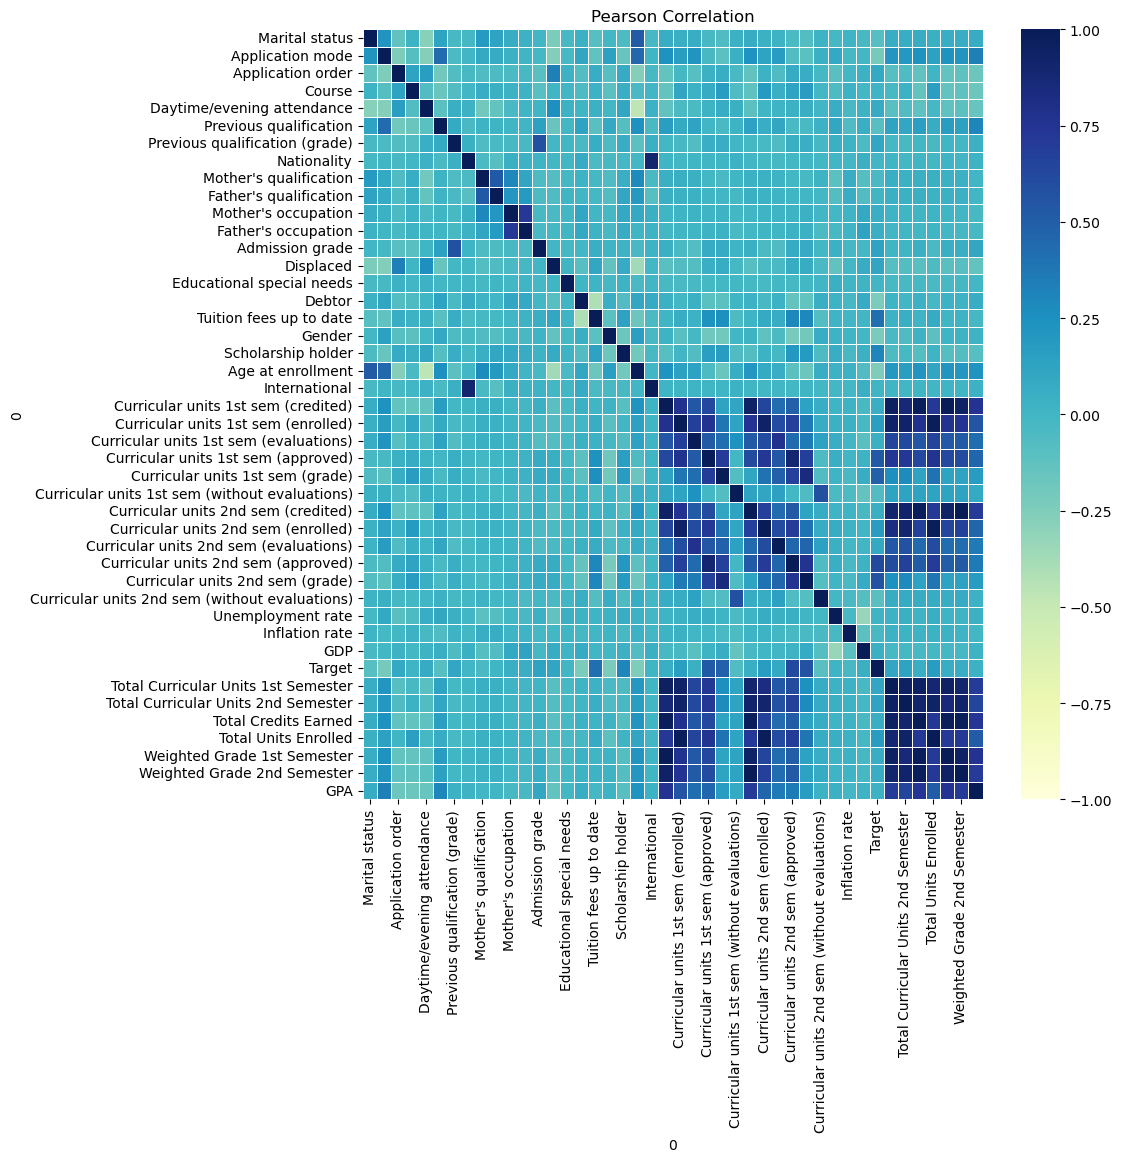

In [42]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, annot = False, fmt = '.2f', cmap = "YlGnBu", cbar = True, linewidths = 0.5)
plt.title("Pearson Correlation")
plt.savefig("Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

##### - Hypothesis tests

In [43]:
# Hypothesis 1: Higher socio-economic status correlates with lower dropout rates
contingency_table = pd.crosstab(school_data["Father's occupation"], school_data['Target'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Hypothesis 1:")
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Hypothesis 1:
Chi-square statistic: 264.4998477174759
P-value: 4.51543856251902e-19


In [44]:
# Hypothesis 2: Students with higher admission grades are less likely to drop out
dropout_grades = school_data[school_data['Target'] == 1]['Admission grade']
retained_grades = school_data[school_data['Target'] == 0]['Admission grade']

t_stat, p_value = ttest_ind(dropout_grades, retained_grades)
print("Hypothesis 2:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Hypothesis 2:
T-statistic: 0.887388764658163
P-value: 0.3749660597041128


In [45]:
# Hypothesis 3: Dropout rates are lower among students receiving financial aid or scholarships.
scholarship_group = school_data[school_data['Scholarship holder'] == 1]['Target']  # Students with scholarships
non_scholarship_group =school_data[school_data['Scholarship holder'] == 0]['Target']  # Students without scholarships

t_stat, p_value = ttest_ind(scholarship_group, non_scholarship_group)

print("Hypothesis 3:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Hypothesis 3:
T-statistic: 20.728700993361098
P-value: 3.632071458342259e-91
